In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

Import `json` file containing library data, aka my entire, possibly embarrassing, Spotify history.

In [42]:
with open(r"C:\Users\rlain\Documents\Python\Spotify\my_spotify_data\YourLibrary.json", encoding="utf-8") as json_data:
    data = json.load(json_data)
    df = pd.DataFrame(data["tracks"])

df.head()

,artist,album,track,uri
0,Keane,The Best Of Keane,Fly To Me,spotify:track:3Bf9nv32awaGVdviHbmp8Q
1,Westlife,Westlife,Change the World,spotify:track:7F99fYE0Y0NF0CVwfBri3c
2,Bowling For Soup,Merry Flippin' Christmas,We're a Couple of Misfits,spotify:track:2cwBepjXqd9MQDNRdw2P5W
3,All Time Low,Last Young Renegade,Nightmares,spotify:track:0LJp1imLp25L6loDVPDMGn
4,My Chemical Romance,Number One,Tomorrow's Money,spotify:track:5gqpaxUlKUuOeqxfj8H1L8


Drop any observations where the album and track name are the same. This eliminates any singles in the album level analysis, and helps to counteract songs that feature in a single and an album.

In [43]:
df_dropsingles = df[df["album"]!=df["track"]].reset_index(drop=True)
df_dropsingles

,artist,album,track,uri
0,Keane,The Best Of Keane,Fly To Me,spotify:track:3Bf9nv32awaGVdviHbmp8Q
1,Westlife,Westlife,Change the World,spotify:track:7F99fYE0Y0NF0CVwfBri3c
2,Bowling For Soup,Merry Flippin' Christmas,We're a Couple of Misfits,spotify:track:2cwBepjXqd9MQDNRdw2P5W
3,All Time Low,Last Young Renegade,Nightmares,spotify:track:0LJp1imLp25L6loDVPDMGn
4,My Chemical Romance,Number One,Tomorrow's Money,spotify:track:5gqpaxUlKUuOeqxfj8H1L8
...,...,...,...,...
6340,Queen,Flash Gordon,The Hero - October 1980... Revisited,spotify:track:71ILTjvSFIgNppZIvq9n9J
6341,The Summer Set,Legendary (Deluxe Edition),Welcome to the World,spotify:track:59YGpG9u5peMdWtaH7jGDx
6342,We The Kings,So Far,Friday Is Forever,spotify:track:0kL3iUcg4kZEFP6XBEE2XE
6343,Queen,Flash Gordon,Flash's Theme Reprise - Remastered 2011,spotify:track:0heQTfM28Qtb4Ij9RBQxDI


Drop track, uri, and duplicates to work at the album level.

In [44]:
df_albums = df_dropsingles[["artist","album"]].drop_duplicates().reset_index(drop=True)
df_albums.head()

,artist,album
0,Keane,The Best Of Keane
1,Westlife,Westlife
2,Bowling For Soup,Merry Flippin' Christmas
3,All Time Low,Last Young Renegade
4,My Chemical Romance,Number One


Count the number of albums per artist, and restrict to artists with at least 3 albums.

In [45]:
df_album_count = df_albums["artist"].value_counts().to_frame(name="album_count").reset_index(names="artist")
df_album_count = df_album_count[df_album_count["album_count"]>=2].copy(deep=True)
df_album_count


,artist,album_count
0,All Time Low,21
1,Queen,18
2,Blake Shelton,16
3,Westlife,14
4,Bowling For Soup,13
...,...,...
85,Fritz Kreisler,2
86,Mariah Carey,2
87,Crown The Empire,2
88,Nicholas Hooper,2


Plot a countplot of artists by number of saved albums.

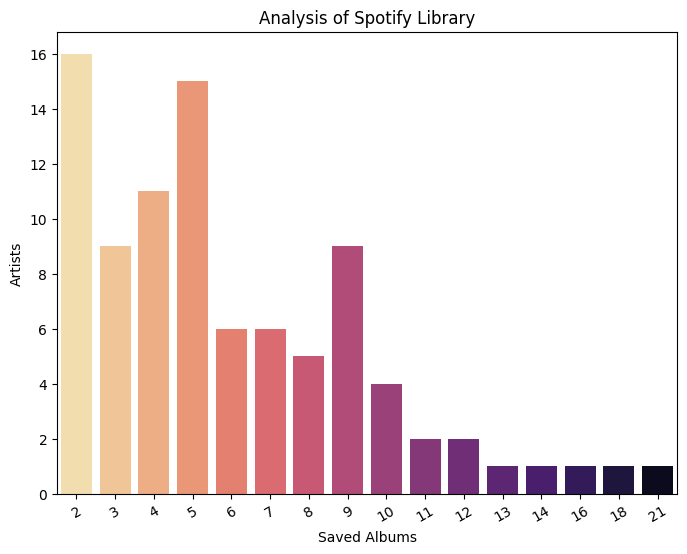

In [46]:
fig, ax = plt.subplots(figsize=(8,6))

# plot a count of observations per category
sns.countplot(data = df_album_count,
              x="album_count",
              palette=sns.color_palette("magma_r", len(df_album_count["album_count"].unique()))
              )

ax.set_xlabel("Saved Albums")
ax.set_ylabel("Artists")
ax.set_title("Analysis of Spotify Library")
# rotate the labels by 30 degrees
ax.set_xticklabels(ax.get_xticklabels(),
              rotation=30)
plt.show()


Create another dataframe for counting songs by artist.

In [47]:
df_song_count = df_dropsingles["artist"].value_counts().to_frame(name="song_count").reset_index(names="artist")
df_song_count


,artist,song_count
0,Queen,281
1,Blake Shelton,259
2,All Time Low,211
3,Bowling For Soup,181
4,Wolfgang Amadeus Mozart,175
...,...,...
202,Amber,1
203,Georges Bizet,1
204,The Makemakes,1
205,Bill Withers,1


Merge the song and album counts using a left merge onto the `df_album_count` dataframe.

In [48]:
df_count = df_album_count.merge(df_song_count, how="left", on="artist")
df_count.head()

,artist,album_count,song_count
0,All Time Low,21,211
1,Queen,18,281
2,Blake Shelton,16,259
3,Westlife,14,165
4,Bowling For Soup,13,181


Create a scatterplot

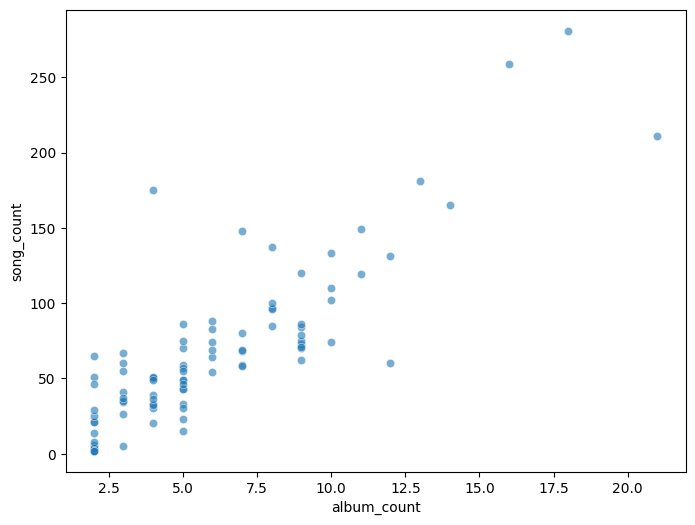

In [51]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=df_count,
                ax=ax,
                x="album_count",
                y="song_count",
                alpha=0.6)


plt.show()
